In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
# Load the data:
data= pd.read_csv('adult.data')
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### H1 Histogram of Education level

In [22]:
# Load the Education donner
df_education = data[['Education',' Education-num']]
df_education

,Education,Education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [26]:
df_education_num = df_education[' Education-num']
df_education_num

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name:  Education-num, Length: 32561, dtype: int64

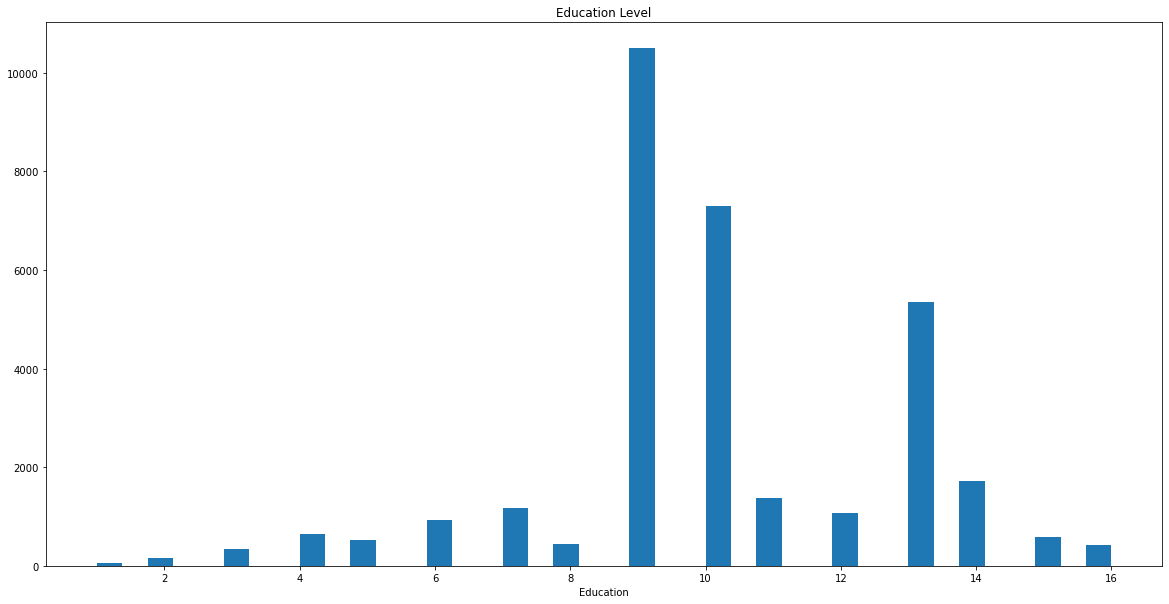

In [27]:
plt.figure(figsize=(20,10))
plt.hist(df_education_num, bins=40)
plt.gca().set(title='Education Level', xlabel='Education');

### H2 Histogram of working hours per week for people with income over 50K

In [5]:
df_hours_per_week = data[['Hours-per-week','Income']] 
df_hours_per_week

,Hours-per-week,Income
0,40,<=50K
1,13,<=50K
2,40,<=50K
3,40,<=50K
4,40,<=50K
...,...,...
32556,38,<=50K
32557,40,>50K
32558,40,<=50K
32559,20,<=50K


In [8]:
df_income_over_50k = pd.DataFrame(df_hours_per_week)
df_income_over_50k = df_income_over_50k[df_income_over_50k['Income'] == ' >50K']
df_income_over_50k

,Hours-per-week,Income
7,45,>50K
8,50,>50K
9,40,>50K
10,80,>50K
11,40,>50K
...,...,...
32539,10,>50K
32545,20,>50K
32554,40,>50K
32557,40,>50K


In [9]:
df_income_over_50k = df_income_over_50k['Hours-per-week']
df_income_over_50k

7        45
8        50
9        40
10       80
11       40
         ..
32539    10
32545    20
32554    40
32557    40
32560    40
Name: Hours-per-week, Length: 7841, dtype: int64

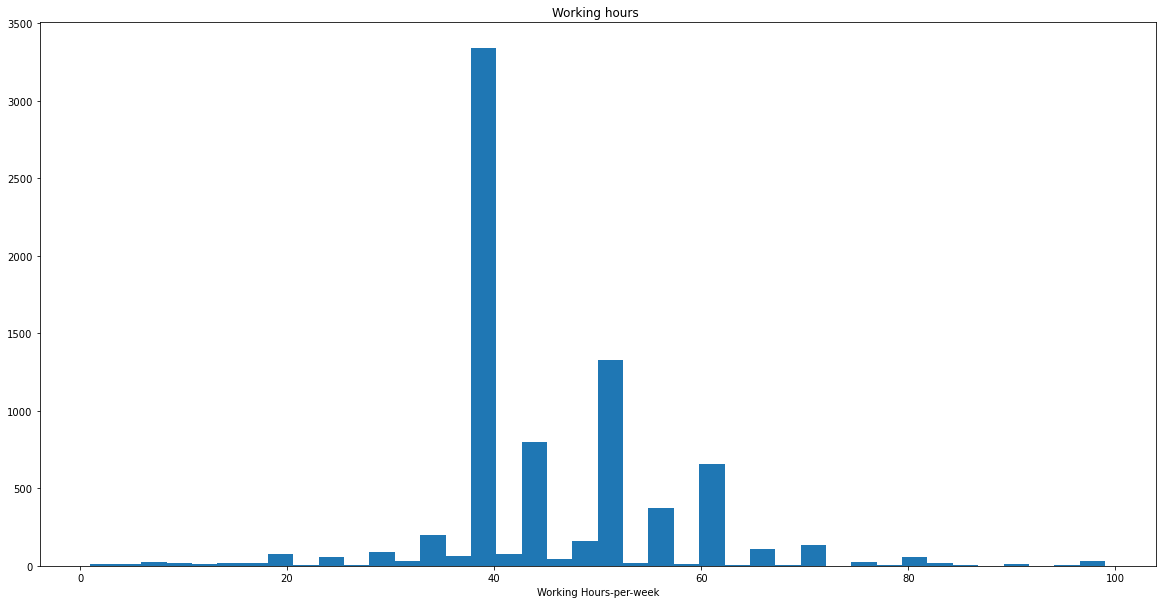

In [16]:
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k, bins=40)
plt.gca().set(title='Working hours ', xlabel='Working Hours-per-week');

### Laplace Mechanism for Histograms

### Q1

### Q2 : Use mechanism Laplace to compute query H1 with {0.01, 0.1, 1}

In [43]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_001.head(10)

0    150.59882
1    150.59882
2    146.59882
3    144.59882
4    150.59882
5    151.59882
6    142.59882
7    146.59882
8    151.59882
9    150.59882
Name:  Education-num, dtype: float64

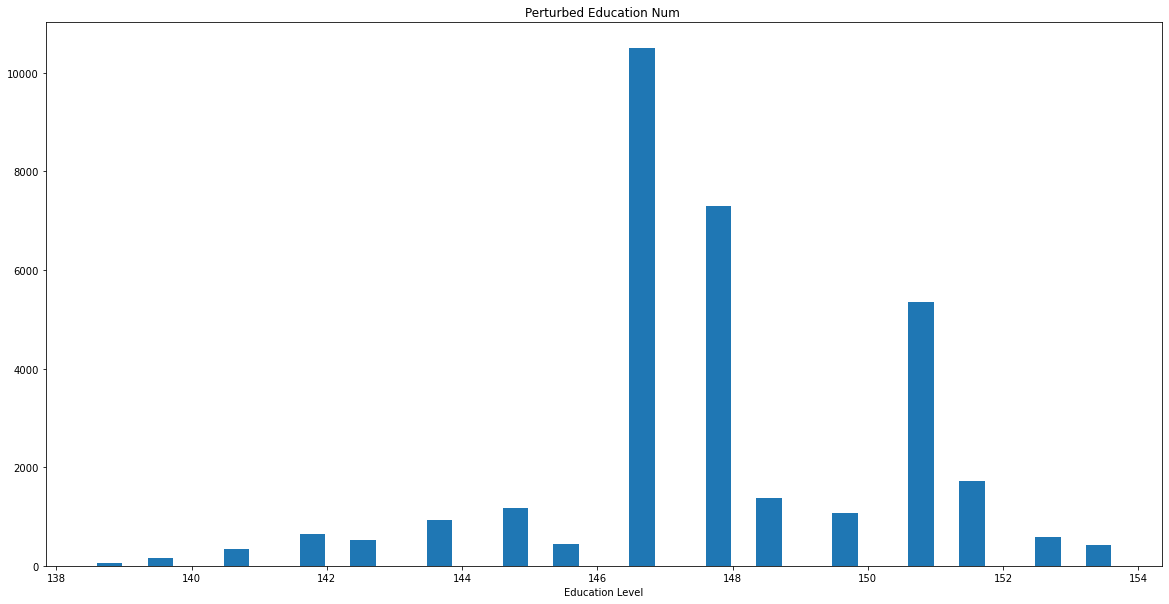

In [44]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [39]:
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_01.head(20)

0     123.472738
1     123.472738
2     119.472738
3     117.472738
4     123.472738
5     124.472738
6     115.472738
7     119.472738
8     124.472738
9     123.472738
10    120.472738
11    123.472738
12    123.472738
13    122.472738
14    121.472738
15    114.472738
16    119.472738
17    119.472738
18    117.472738
19    124.472738
Name:  Education-num, dtype: float64

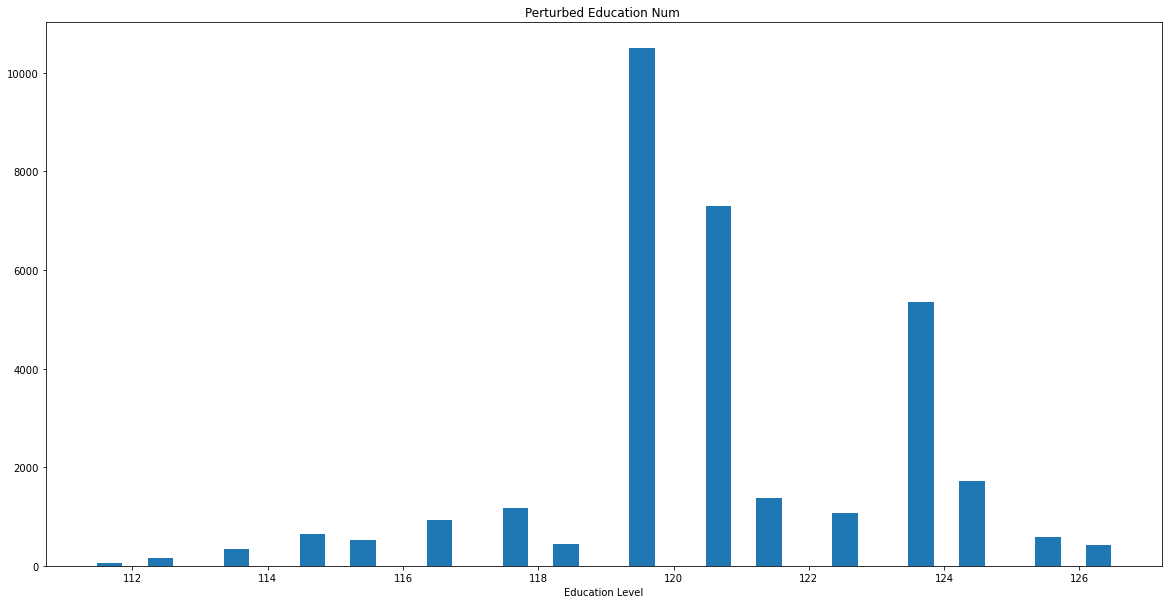

In [40]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [41]:
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_1.head(20)

0     124.225482
1     124.225482
2     120.225482
3     118.225482
4     124.225482
5     125.225482
6     116.225482
7     120.225482
8     125.225482
9     124.225482
10    121.225482
11    124.225482
12    124.225482
13    123.225482
14    122.225482
15    115.225482
16    120.225482
17    120.225482
18    118.225482
19    125.225482
Name:  Education-num, dtype: float64

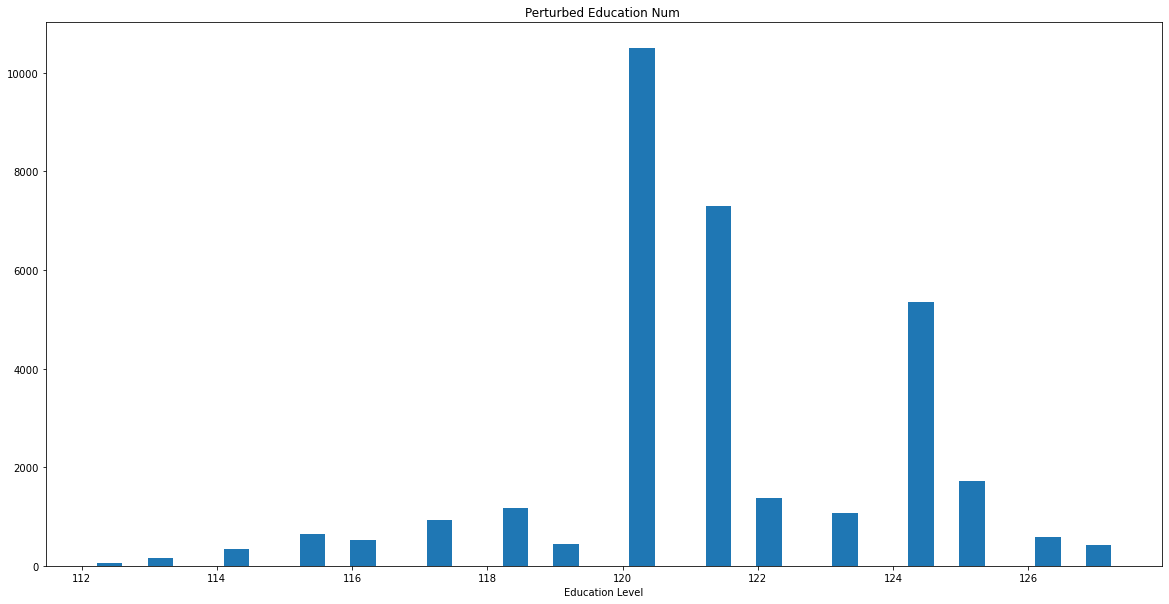

In [42]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

### Q3 1- :  Use mechanism Laplace to compute query H2 with {0.01, 0.1, 1}

In [46]:
sensitivity = 1
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_income_over_50k_001.head(20)

7     157.219812
8     162.219812
9     152.219812
10    192.219812
11    152.219812
14    152.219812
19    157.219812
20    172.219812
25    152.219812
27    172.219812
38    150.219812
45    152.219812
52    172.219812
53    167.219812
55    152.219812
63    157.219812
67    152.219812
68    162.219812
72    182.219812
84    152.219812
Name: Hours-per-week, dtype: float64

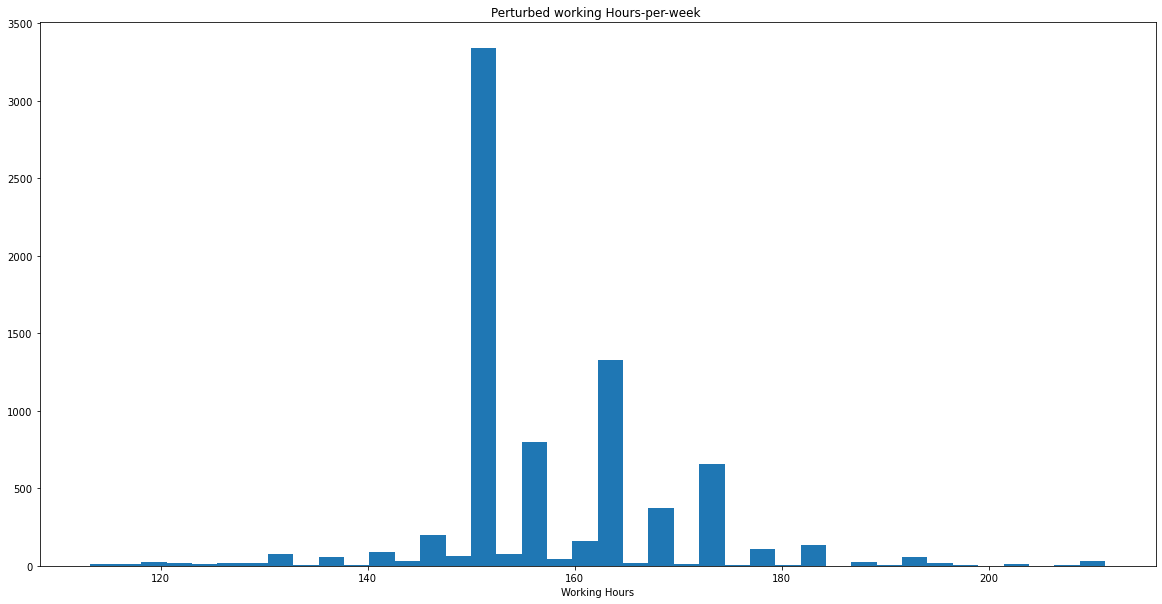

In [47]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed working Hours-per-week ', xlabel='Working Hours');

In [48]:
sensitivity = 1
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_income_over_50k_01.head(20)

7     40.996125
8     45.996125
9     35.996125
10    75.996125
11    35.996125
14    35.996125
19    40.996125
20    55.996125
25    35.996125
27    55.996125
38    33.996125
45    35.996125
52    55.996125
53    50.996125
55    35.996125
63    40.996125
67    35.996125
68    45.996125
72    65.996125
84    35.996125
Name: Hours-per-week, dtype: float64

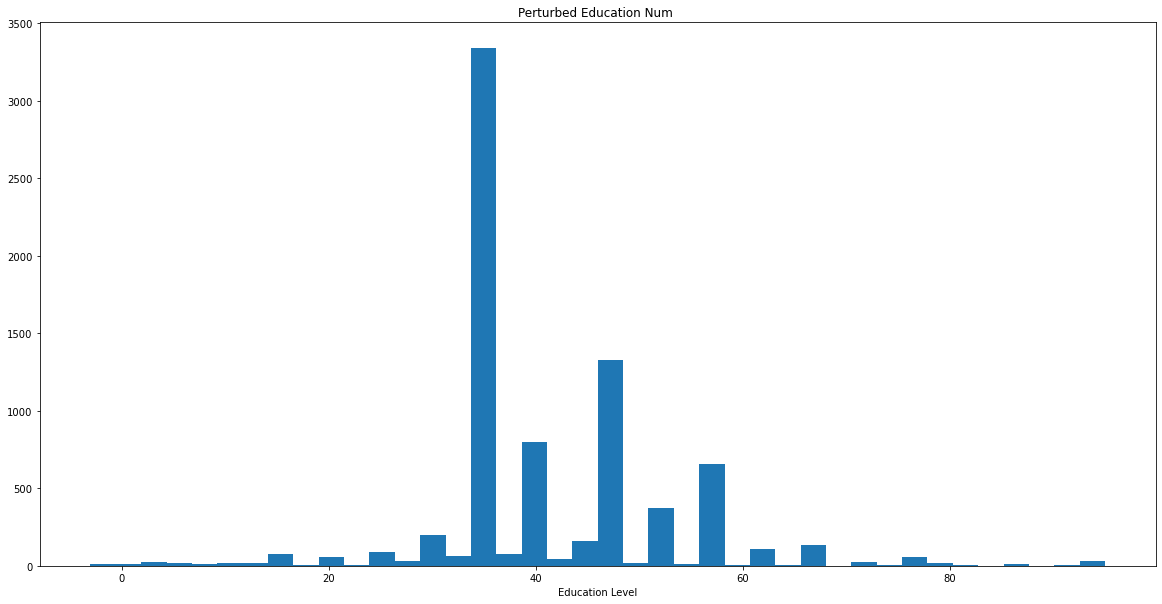

In [50]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [51]:
sensitivity = 1
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_income_over_50k_1.head(20)

7     45.50237
8     50.50237
9     40.50237
10    80.50237
11    40.50237
14    40.50237
19    45.50237
20    60.50237
25    40.50237
27    60.50237
38    38.50237
45    40.50237
52    60.50237
53    55.50237
55    40.50237
63    45.50237
67    40.50237
68    50.50237
72    70.50237
84    40.50237
Name: Hours-per-week, dtype: float64

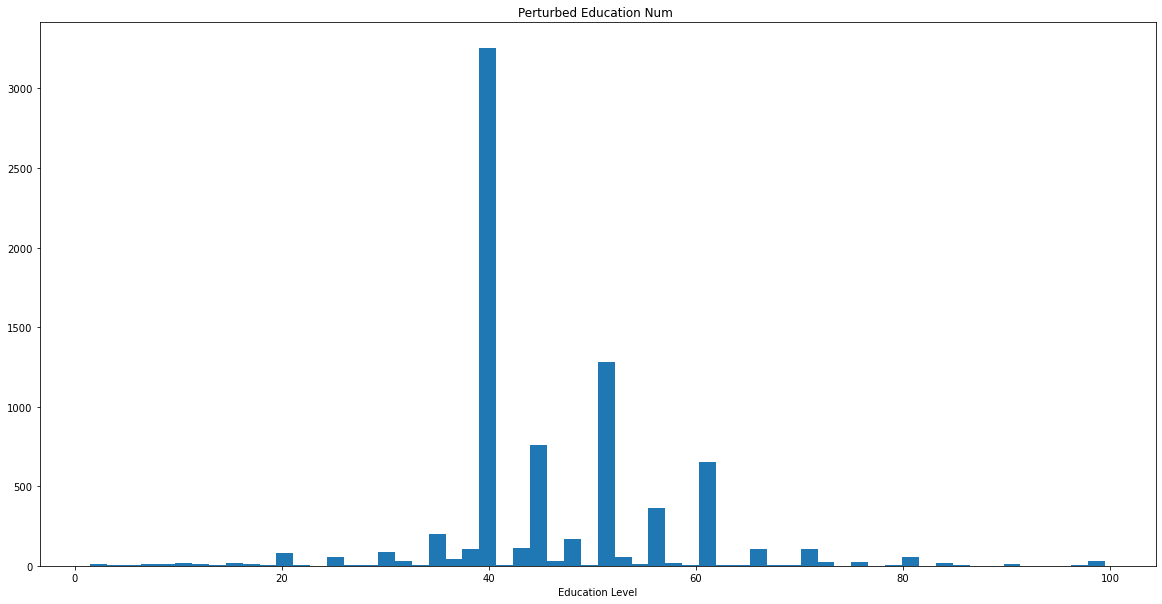

In [53]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=60)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### 